# Predicting the Sale Price of Houses

In [45]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train.csv")

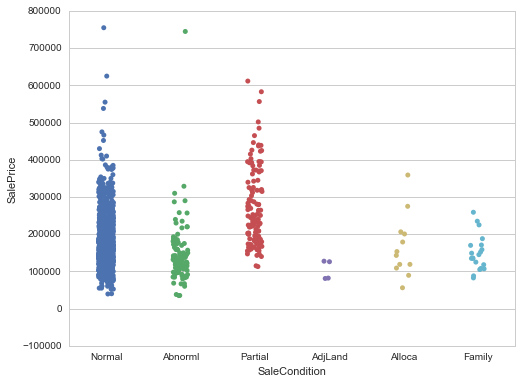

In [134]:
sns.set(style="whitegrid", color_codes=True)
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="SaleCondition", y="SalePrice", data=df,jitter=True);

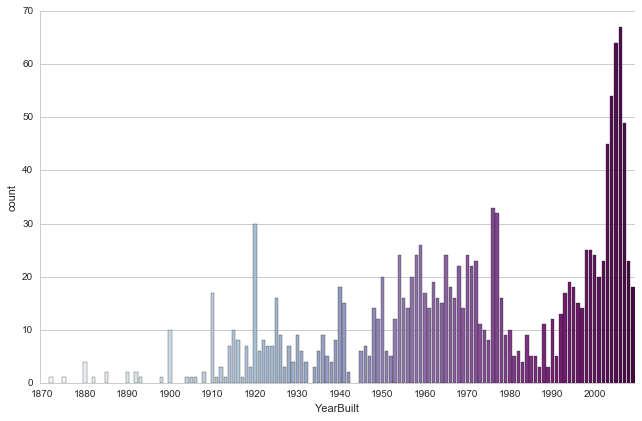

In [170]:
years = np.arange(1870, 2010)
g = sns.factorplot(x="YearBuilt", data=df, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=10)

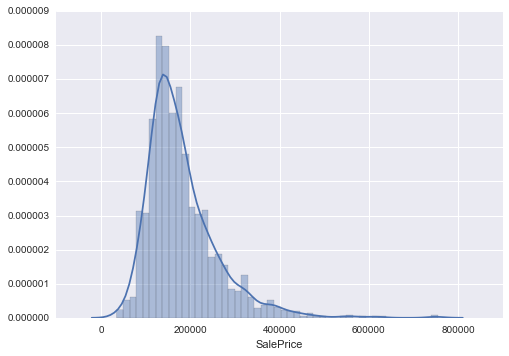

In [179]:
sns.distplot(df['SalePrice']);

In [145]:
df[df['SalePrice'] == 755000.000000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000


In [150]:
df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [154]:
print df[df['LotArea'] == 215245]

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
313  314          20       RL        150.0   215245   Pave   NaN      IR3   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
313         Low    AllPub    ...            0    NaN   NaN         NaN   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
313       0      6   2009        WD         Normal     375000  

[1 rows x 81 columns]


In [351]:
# df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 
#  'BsmtFinType1','BsmtFinSF1','BsmtFinType2',
#    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']].to_dict()
#df.ix[df['Alley'].isnull()].to_dict()['Street']
#df.ix[df['MiscFeature'].isnull()].to_dict()['MiscVal']
#df['Fence'].describe()

In [ ]:
for i in df.columns:
    print i,df[i][313],df[i][691]

In [350]:
df['LotFrontage'].fillna(0,inplace=True)
df['Alley'].fillna('NA',inplace=True)
df['MasVnrArea'].fillna(0,inplace=True)
df['MasVnrType'].fillna('None',inplace=True)
df['BsmtQual'].fillna('NA',inplace=True)
df['BsmtCond'].fillna('NA',inplace=True)
df['BsmtExposure'].fillna('NA',inplace=True)
df['BsmtFinType1'].fillna('NA',inplace=True)
df['BsmtFinType2'].fillna('NA',inplace=True)
df['Electrical'].fillna('SBrkr',inplace=True)
df['FireplaceQu'].fillna('NA',inplace=True)
df['GarageType'].fillna('NA',inplace=True)

# Remove column
#df['GarageYrBlt'].fillna('None',inplace=True)

df['GarageFinish'].fillna('NA',inplace=True)
df['GarageQual'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)
df['PoolQC'].fillna('NA',inplace=True)
df['Fence'].fillna('MnWw',inplace=True)
df['MiscFeature'].fillna('NA',inplace=True)


In [357]:
def find_missing_columns(df):
    lst_nmissing = []
    lst_missing = []
    for c in df.columns:
        if not (df[c].count() < 1460):
            lst_nmissing.append(c)
        else:
            #print c, df[c].count()
            lst_missing.append(c)
    #print lst_missing
    
    print "Number of Columns with no missing value:",len(lst_nmissing)
    
    print "Number of Columns with missing value:",len(lst_missing)
    
    #lst_missing.append('SalePrice')
    
    #lst_missing.append('TotalBsmtSF')
    return lst_missing,lst_nmissing
missing_c,notmissing_c = find_missing_columns(df)
fill_df = df[notmissing_c].describe()

Number of Columns with no missing value: 80
Number of Columns with missing value: 1


In [124]:
def vectorize(df):
    
    data = df.to_dict(orient='records')
    
    vec = DictVectorizer()
    
    vec_data = vec.fit_transform(data).toarray()
    
    return vec,vec_data

In [359]:
def linear_regr(train,target,feature_names):
    
    X = train
    y = target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    regr = linear_model.LinearRegression()
    
    #fit model
    regr.fit(X_train, y_train)
    
    #predicted = regr.predict(X_test)
    
    #rms = np.mean(np.sqrt((predicted - y_test)**2))
    
    plot_coeffs(regr.coef_,feature_names,"Linear")


In [360]:
def plot_coeffs(coeffs,feature_names,model_name):
    
    coeff = pd.Series(coeffs,index = feature_names )
    imp_coef = pd.concat([coeff.sort_values().head(10),
                     coeff.sort_values().tail(10)])
    
    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    imp_coef.plot(kind = "barh")
    print imp_coef.to_dict().keys()
    plt.title("Coefficients in the "+model_name+" Model")

['EnclosedPorch', 'PoolArea', '1stFlrSF', 'ScreenPorch', 'BsmtUnfSF', 'LotFrontage', 'YrSold', 'MiscVal', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'LotArea', 'GrLivArea', 'YearBuilt', 'LowQualFinSF', 'GarageArea', 'TotalBsmtSF', 'MasVnrArea', 'WoodDeckSF', 'BsmtFinSF2']


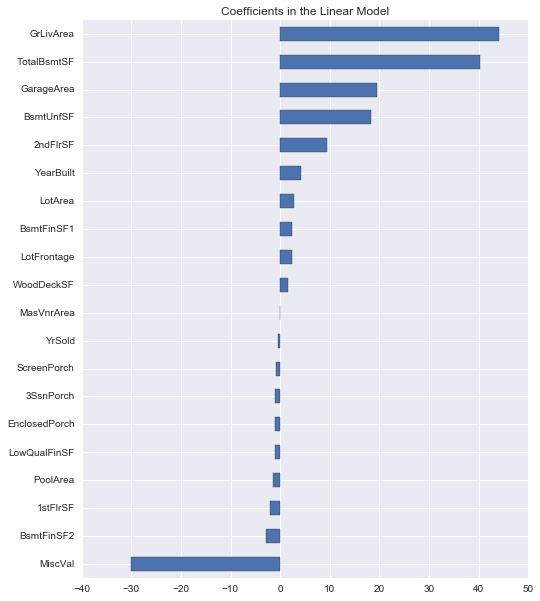

In [362]:
# reduced = df.columns.tolist()
# # removing certain fields
# reduced.remove('Alley')
# reduced.remove('PoolQC')
# reduced.remove('Fence')
# reduced.remove('MiscFeature')

# # removing rows that have missing fields
# refined_df = refined_df.dropna()

# #removing target variable to get the train set
# reduced.remove('SalePrice')
# train_df = refined_df[reduced]

# #have the target variable
# target_df = refined_df['SalePrice']

# #vectorize train 
# vec,train = vectorize(train_df)

# #call the regression method
# #linear_regr(train,target_df,vec.get_feature_names())

# imp_features_linear = ['LotArea','BsmtExposure', '1stFlrSF', 'BldgType', 'BsmtFinType1',
#                        'BsmtCond', '2ndFlrSF', 'LowQualFinSF','TotalBsmtSF','GrLivArea','SalePrice']
# linear_df = refined_df[imp_features_linear]

train = fill_df.columns.tolist()
train.remove('SalePrice')
train.remove('Id')
train_df = fill_df[train]
target_df = fill_df['SalePrice']
vec,train = vectorize(train_df)

#call the regression method
linear_regr(train,target_df,vec.get_feature_names())

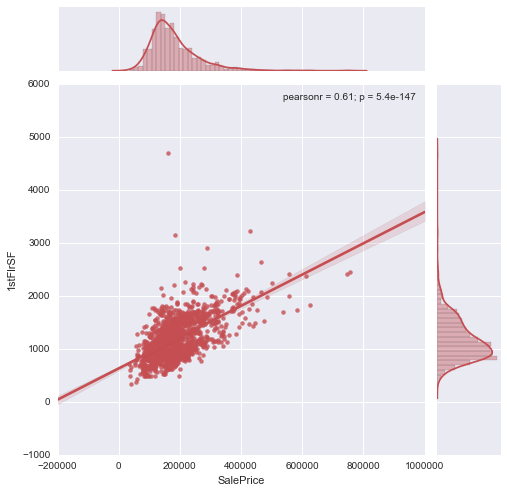

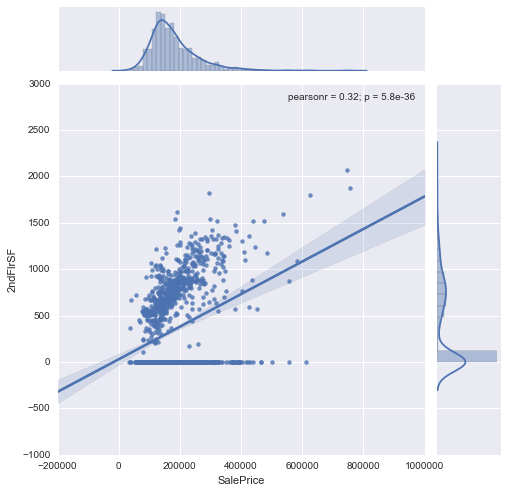

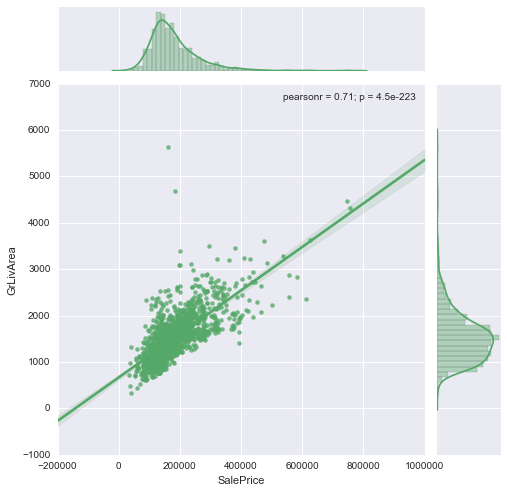

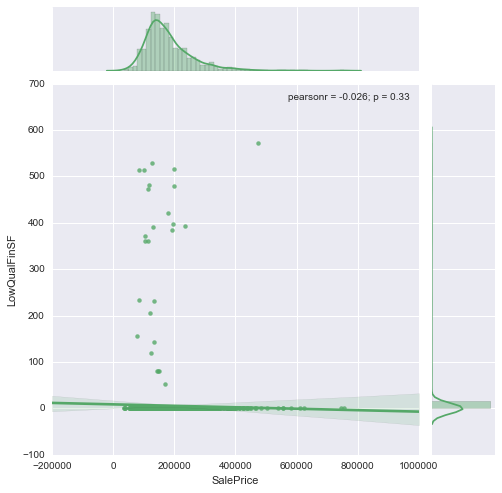

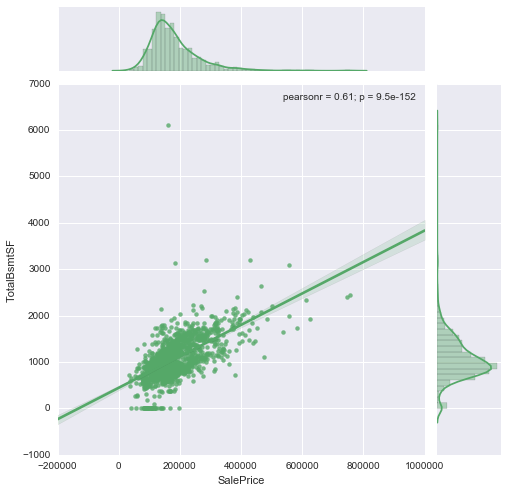

In [236]:
sns.set(style="darkgrid", color_codes=True)
g = sns.jointplot('SalePrice',"1stFlrSF",data=df, kind="reg", color="r", size=7)
g = sns.jointplot('SalePrice',"2ndFlrSF",data=df, kind="reg", color="b", size=7)
g = sns.jointplot('SalePrice',"GrLivArea",data=df, kind="reg", color="g", size=7)
g = sns.jointplot('SalePrice','LowQualFinSF',data=df, kind="reg", color="g", size=7)
g = sns.jointplot('SalePrice','TotalBsmtSF',data=df, kind="reg", color="g", size=7)